# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!
  
#### Import all the necessary libraries here:


In [82]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Challenge 1

#### Read the `employees` dataset
Save your data in a variable called `employees`.

In [4]:
# your code here
employees=pd.read_csv(r'C:\Users\lenovo\Desktop\ironhack\Labs\DAFT_212\module_2\Lab_5_ Pivot-Tables-and-Crosstab\Employee.csv')

In [5]:
employees.head()

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


#### What's the mean `Salary` by `Department`?
**Tip**: There are 2 ways to do it: with or without pivot tables. Do it both ways. 

In [6]:
# Method 1
# your code here
pd.pivot_table(employees,values='Salary',index='Department',aggfunc='mean')

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [7]:
# Method 2
# your code here
employees[['Department','Salary']].groupby(by='Department').agg('mean')

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### Now, group the data by more than one column. Use Pandas pivot table function to select the mean `Salary` by `Department` and `Title`.

In [8]:
# your code here
pd.pivot_table(employees,values='Salary',index=['Department','Title'],aggfunc='mean')

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### Display the number of `Years` of work experience and the `Salary` for each `Title`. Add `Years` as a column in your pivot table.
**Hint**: Use Pandas documentation to explore the [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) function.

In [9]:
# your code here
pd.pivot_table(employees,values=['Years','Salary'],index=['Title'],aggfunc='mean')

,Salary,Years
Title,,
VP,70.000000,8.00
analyst,32.500000,2.25
associate,56.666667,4.00


#### Find the mean `Salary` and number of employees in each `Department` and for each job `Title`.

In [10]:
# your code here
pd.pivot_table(employees,index=['Department','Title'],values=['Salary'],aggfunc=['mean','count'])

mean  count
                     Salary Salary
Department Title                  
HR         VP          70.0      1
           analyst     32.5      2
IT         VP          70.0      1
           analyst     32.5      2
           associate   60.0      1
Sales      associate   55.0      2

#### For each `Department` and each job `Title`, find the `Salary` median, minimum, maximum and standard deviation. Comment your results.

In [11]:
# your code here
pd.pivot_table(employees,index=['Department','Title'],values=['Salary'],aggfunc=['median','min','max','std'],margins=False)

median    min    max       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60       NaN
Sales      associate   55.0     55     55  0.000000

In [12]:
"""
your commments here
The data set is really small, and min max std do not seem to be very relevant
"""


'\nyour commments here\nThe data set is really small, and min max std do not seem to be very relevant\n'

#### Based on your comments, fill the missing values with an appropriate value.

In [17]:
# your code here
df=pd.pivot_table(employees,index=['Department','Title'],values=['Salary'],aggfunc=['median','max','min','std'],margins=False, fill_value=0)

In [19]:
df.fillna(0,inplace=True)

#### The stake holders want to know, for each `Department`, the number of employees and how much money is spent on salaries. Could you provide that information? 

In [24]:
# your code here
pd.pivot_table(employees,index=['Department'],values=['Salary'],aggfunc=['sum','count'])

,sum,count
,Salary,Salary
Department,,
HR,135,3
IT,195,4
Sales,110,2


#### For each `Department` and `Title`, find the the total years of work experience and the mean `Salary`.

In [22]:
employees.columns

Index(['Name', 'Department', 'Education', 'Gender', 'Title', 'Years',
       'Salary'],
      dtype='object')

In [26]:
# your code here
df2=pd.pivot_table(employees,index=['Department','Title'],values=['Years','Salary'],aggfunc=['sum','mean'])

In [28]:
df2

sum         mean      
                     Salary Years Salary Years
Department Title                              
HR         VP            70     8   70.0   8.0
           analyst       65     6   32.5   3.0
IT         VP            70     8   70.0   8.0
           analyst       65     3   32.5   1.5
           associate     60     7   60.0   7.0
Sales      associate    110     5   55.0   2.5

## Bonus Challenge 1

#### Compute the mean `Salary` after removing the maximum `Salary` for each `Department`. Create the appropriate pivot table.
**Hint**: Write a custom function.

In [31]:
# your code here
employees.sort_values(by='Title')

,Name,Department,Education,Gender,Title,Years,Salary
6,Carlos,IT,Master,M,VP,8,70
8,Ana,HR,Master,F,VP,8,70
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


In [35]:
employees.drop(index=[6,8],inplace=True)

In [36]:
employees

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


In [ ]:
pd.pivot_table(employees,index=['Department','Title'],values=['Years','Salary'],aggfunc=['sum','mean'])

# Challenge 2

#### Read the `fitbit` dataset 
Save your data in a variable called `fitbit`.

In [37]:
# your code here
fitbit=pd.read_csv(r'C:\Users\lenovo\Desktop\ironhack\Labs\DAFT_212\module_2\Lab_5_ Pivot-Tables-and-Crosstab\Fitbit.csv')

#### Explore you dataset in terms of data types and descriptive statistics.
**Hint**: Use Pandas functions from previous lectures.

In [38]:
# your code here
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


In [40]:
fitbit.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

#### You suspect that there must be a linear relationship between the `Minutes Very Active` and the `Steps`. Compute the correlation between these variables.

In [42]:
# your code here
fitbit['Minutes Very Active'].corr(fitbit['Steps'])

0.5714518481062609

#### Use matplotlib to visually plot `Minutes Very active` vs `Steps`. We'll work with matplotlib next week. As a first introduction, uncomment and complete the following code. You need to replace the # symbol for the correct function arguments. 

In [43]:
import matplotlib.pyplot as plt

In [44]:
"""
plt.scatter(#, #)
plt.title(#)
plt.xlabel(#)
plt.ylabel(#)
plt.show()
"""
x=fitbit['Minutes Very Active']
y=fitbit['Steps']

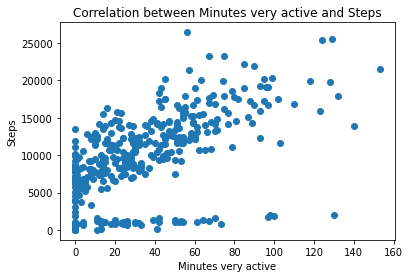

In [47]:
plt.scatter(x,y)
plt.title('Correlation between Minutes very active and Steps')
plt.xlabel('Minutes very active')
plt.ylabel('Steps')
plt.show()

#### What can you say about `Minutes Very Active` and `Steps`? Write a comment below.

In [49]:
"""
We see a correlation but not very intense, probably because of outliers in the lower part (long activity but low number of steps)
"""

'\nWe see a correlation but not very intense, probably because of outliers in the lower part (long activity but low number of steps)\n'

#### We also suspect that there must be a linear relationship between the `Minutes Sedentary` and the `Steps`. Compute the correlation between these variables.

In [51]:
fitbit['Minutes Sedentary'].corr(fitbit['Steps'])

0.07690608062990095

#### Use matplotlib to visually plot `Minutes Sedentary` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

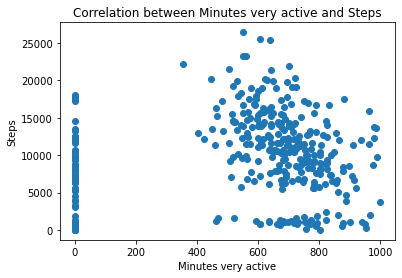

In [50]:
# your code here
x=fitbit['Minutes Sedentary']
y=fitbit['Steps']

plt.scatter(x,y)
plt.title('Correlation between Minutes very active and Steps')
plt.xlabel('Minutes very active')
plt.ylabel('Steps')
plt.show()

In [ ]:
"""
No correlation appears between the 2 variables
"""

#### We also suspect that there must be a linear relationship between the `MinutesOfSleep` and the `Steps`. Compute the correlation between these variables.

In [52]:
# your code here
fitbit['MinutesOfSleep'].corr(fitbit['Steps'])

0.13098565950836383

#### Use matplotlib to visually plot `MinutesOfSleep` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

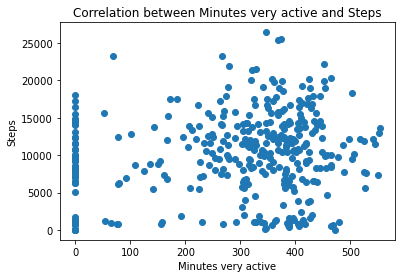

In [53]:
# your code here
x=fitbit['MinutesOfSleep']
y=fitbit['Steps']

plt.scatter(x,y)
plt.title('Correlation between Minutes very active and Steps')
plt.xlabel('Minutes very active')
plt.ylabel('Steps')
plt.show()

In [ ]:
"""
your commments here
The plot is too scattered to show a correlation, same as the calculation
"""

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`.

In [58]:
columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']

In [61]:
# your code here
subset = fitbit[['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']]

In [63]:
cor_fit=subset.corr()

In [64]:
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix, which of the features are highly correlated with variable `Steps`?
**Hint**: sort the correlations of `Steps` vs the rest of the features in descending order. You can use Pandas `sort_values`. 

In [65]:
# your code here
cor_fit.sort_values(by='Steps')

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986


In [ ]:
"""Minutes very active appear to be the most correlated feature"""

# Challenge 3

#### Read the `time_grades` dataset from Ironhack's database:
* db: `time_grades`
* table: `time_grades`

Save your data in a variable called `time_grades`.

In [66]:
# your code here
time_grades=pd.read_csv(r'C:\Users\lenovo\Desktop\ironhack\Labs\DAFT_212\module_2\Lab_5_ Pivot-Tables-and-Crosstab\time_grades.csv')

In [76]:
time_grades.sort_values(by='Study time',inplace=True)

#### Show visually the frequency distribution of the `time_grades` dataset.

<AxesSubplot:xlabel='Grade', ylabel='Study time'>

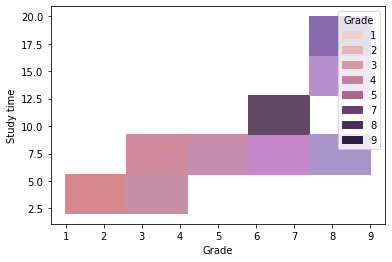

In [77]:
# your code here
sns.histplot(data=time_grades,y='Study time',x='Grade',hue="Grade")

#### Is there a correlation between `Study time` and `Grade`? Use both Pearson and Spearman correlations and comment your results.

In [78]:
# your code here
time_grades['Study time'].corr(time_grades['Grade'])

0.7980456073578858

In [80]:
time_grades['Study time'].corr(time_grades['Grade'],method='spearman')

0.819658753036942

In [81]:
"""
your commments here
The correlation appears very high between these 2 parameters, whether it is with Pearson or Spearman
"""

'\nyour commments here\nThe correlation appears very high between these 2 parameters, whether it is with Pearson or Spearman\n'

#### Use matplotlib to visually plot `Study time` vs `Grade`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

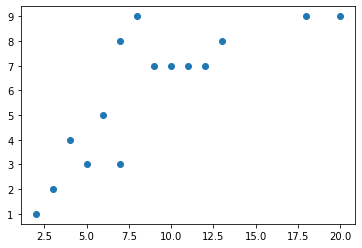

In [85]:
# your code here
plt.scatter(time_grades['Study time'],time_grades['Grade'])

In [ ]:
"""
your commments here
The correlation is not that obvious on the visualisation, whereas the computation shows a strong correlation
"""

#### Could you explain the difference between Pearson and Spearman correlations?

In [ ]:
"""
To put it simply, the Spearman correlation is more simple, and more precise
"""